In [20]:
# Modified February 6, 2020

In [21]:
import sys, os

sys.path.append('/Users/ajc/codes/simulator/debug/ats-mesh/tools/meshing_ats/meshing_ats')
import meshing_ats

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import scipy.signal

In [22]:
xl =pd.ExcelFile('Topo_Profiles_Barrow.xlsx')

In [23]:
xl.sheet_names
print (xl.sheet_names)
data = xl.parse(sheet_name='Transect B, Area C')
keys = data.keys()
slice_at_right = False

['Transect A, Polygon near ERT', 'Transect B, Polygon near ERT', 'Transect Area B', 'Transect A, Area C', 'Transect B, Area C', 'Repeat ERT Transect']


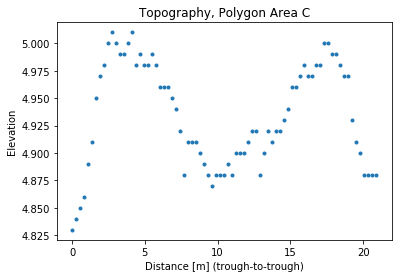

In [24]:
plt.plot(data['Distance_m'], data['Z'],'.')
plt.ylabel('Elevation')
plt.title('Topography, Polygon Area C')
plt.xlabel('Distance [m] (trough-to-trough)')
plt.show()

HERE


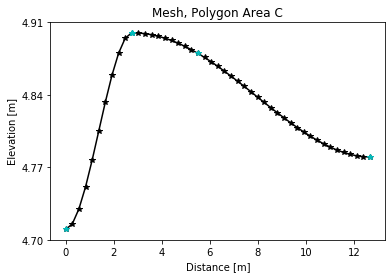

In [29]:
# smooth the topographic data : February 13 and trough cell inward oriented
length = len(data['Distance_m'])
x = []
z = []

if (slice_at_right):
    x = np.array(data['Distance_m'][length/2:])
    z = np.array(data['Z'][length/2:])
else:
    x = np.array(data['Distance_m'][:46])
    z = np.array(data['Z'][:46])

z = [z1 - 0.1127955 for z1 in z] # match the trough's elevation with the "trough elevation" from water-table data 
A1 = []
A1 = np.insert(x, 0, -x[1])
x = np.array([a + x[1] for a in A1])
z = np.insert(z,0, z[0]+.0000)

#z_smooth = scipy.signal.savgol_filter(Z1, window_length=17, polyorder=3, mode='constant',cval=4.7)
lower_it = 0#0.05
lower_center = 0#0.03
if lower_it > 0 and lower_center <= 0: #revert sign to execute
    x1 = [x[0], x[10]]
    z1 = [z[0], z[10]-lower_it]
    x2 = [x[10], x[20], x[-1]]
    z2 = [z[10]-lower_it, z[20]-lower_it, z[-1]]
    cs1 = scipy.interpolate.CubicSpline(x1,z1, bc_type='clamped')
    cs2 = scipy.interpolate.CubicSpline(x2,z2, bc_type='clamped')
elif lower_center > 0: #revert sign to execute 
    x1 = [x[0], x[1], x[10]]
    z1 = [z[0], z[1], z[10]-lower_it]
    x2 = [x[10], x[20], x[-1]]
    z2 = [z[10]-lower_it, z[20]-lower_it, z[-1]-lower_center]
    cs1 = scipy.interpolate.CubicSpline(x1,z1, bc_type='clamped')
    cs2 = scipy.interpolate.CubicSpline(x2,z2, bc_type='clamped')
else:
    print ('HERE')
    x1 = [x[0], x[10]]
    z1 = [z[0] , z[10]]
    x2 = [x[10], x[22], x[-1]]
    z2 = [z[10], z[22], z[-1]]
    cs1 = scipy.interpolate.CubicSpline(x1,z1, bc_type='clamped')
    cs2 = scipy.interpolate.CubicSpline(x2,z2, bc_type='clamped')

updated6 = False
if updated6 == True:
    x1 = [x[0], x[10]]
    z1 = [z[0], 4.81]
    x2 = [x[10], x[20], x[-1]]
    z2 = [4.81, z[20]-0.08, 4.78]
    cs1 = scipy.interpolate.CubicSpline(x1,z1, bc_type='clamped')
    cs2 = scipy.interpolate.CubicSpline(x2,z2, bc_type='clamped')



# This is the topography used in the paper: February 6, 2020
rim = 4.9
x1_N3 = [x[0], x[10]]
z1_N3 = [4.71, rim]
x2_N3 = [x[10], x[20], x[-1]]
z2_N3 = [rim, rim-0.02, 4.78]
cs1 = scipy.interpolate.CubicSpline(x1_N3,z1_N3, bc_type='clamped')
cs2 = scipy.interpolate.CubicSpline(x2_N3,z2_N3, bc_type='clamped')

#z_smooth_N3 = np.concatenate((cs1(x[:11]), cs2(x[11:])))
#z_smooth_N3 = np.array([round(s,4) for s in z_smooth_N3])

#z_left = z_smooth_N3
#xx = x1_N3 + x2_N3
#zz = z1_N3 + z2_N3

z_smooth = np.concatenate((cs1(x[:11]), cs2(x[11:])))

if (slice_at_right):
    z = z[::-1]
    z_smooth = z_smooth[::-1]
    x = x[::-1]

z_smooth = np.array([round(s,4) for s in z_smooth])

#plt.plot(x, z, '.', color='r')
plt.plot(x, z_smooth, '-*', color = 'k')
plt.plot(x1_N3,z1_N3,'*', color='c')
plt.plot(x2_N3,z2_N3,'*', color='c')
#plt.plot(x3,z3,'*', color='c')
#plt.plot(x4,z4,'.', color='g')
plt.ylabel('Elevation [m]')
plt.xlabel('Distance [m]')
plt.title('Mesh, Polygon Area C')
plt.ylim(4.7,4.91)
plt.yticks(np.linspace(4.7,4.91,4))
plt.show()


In [ ]:
generic_twopiewedges = False
updated_topo2 = False
if (generic_twopiewedges):
    x = np.array(data['Distance_m'])
    z = np.array(data['Z'])
    z = [z1 - 0.1127955 for z1 in z]
    x1 = [x[0], x[10]]
    z1 = [z[0], z[10]]
    lmid = length/2
    
    x2 = [x[10], x[20], x[lmid]]
    z2 = [z[10], z[20]-0.02, z[lmid]-0.01]
    
    print z[0], z[lmid],  z[0] - z[lmid]
    x3 = [x[lmid],x[lmid+ 26]]
    z3 = [z[lmid]-0.01, z[lmid+26] - 0.035]
    x4 = [x[lmid+26], x[-1]]
    z4 = [z[lmid+26] - 0.035, z[0] ]
    if (updated_topo2):
        x1 = [x[0], x[10]]
        z1 = [z[0], z[10]-0.045]
        x2 = [x[10]-0.045, x[lmid]]
        z2 = [z[10] - 0.045, z[lmid]-0.01]
    cs1 = scipy.interpolate.CubicSpline(x1,z1, bc_type='clamped')
    cs2 = scipy.interpolate.CubicSpline(x2,z2, bc_type='clamped')
    cs3 = scipy.interpolate.CubicSpline(x3,z3, bc_type='clamped')
    cs4 = scipy.interpolate.CubicSpline(x4,z4, bc_type='clamped')

z_smooth = np.concatenate((cs1(x[:11]), cs2(x[11:lmid]), cs3(x[lmid:lmid+26]), cs4(x[lmid+26:])))

upudated_topo3:  True


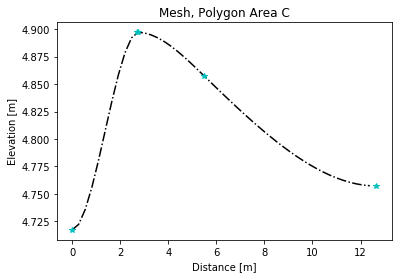

In [16]:
# turn on for single pie wedge original mesh (updated-topo, see Feb7 plots)
#z_smooth = np.concatenate((cs1(x[:11]), cs2(x[11:lmid])))
#x = x[:len(z_smooth)]

updated_topo3 = True
shift = 2
if (updated_topo3):
    print ('upudated_topo3: ', updated_topo3)
    x = np.array(data['Distance_m'])
    z = np.array(data['Z'])
    length= len(x) 
    lmid = int(length/2 + 8)
    z = [z1 - 0.1127955 for z1 in z]
    
    x1 = [x[0], x[10]]
    z1 = [z[0], z[10]]
    x2 = [x[10]-0.045, x[20], x[lmid]]
    z2 = [z[10], z[20]-0.02, z[lmid -10]-0.01]
    cs1 = scipy.interpolate.CubicSpline(x1,z1, bc_type='clamped')
    cs2 = scipy.interpolate.CubicSpline(x2,z2, bc_type='clamped')
    z_smooth = np.concatenate((cs1(x[:11]), cs2(x[11:lmid])))
    x = x[:lmid]
    plt.plot(x, z_smooth, '-.', color = 'k')
    plt.plot(x1,z1,'*', color='c')
    plt.plot(x2,z2,'*', color='c')
   
    plt.ylabel('Elevation [m]')
    plt.xlabel('Distance [m]')
    plt.title('Mesh, Polygon Area C')
    plt.show()

# this is no xx-updated4.exo mesh
updated_topo4 = False

if (updated_topo4):
    print ('upudated_topo4: ', updated_topo4)
    x = np.array(data['Distance_m'])
    z = np.array(data['Z'])
    length= len(x) 
    lmid = length/2 + 7
    z = [z1 - 0.1127955 for z1 in z]
    
    x1 = [x[0], x[10]]
    z1 = [z[0], z[10]]
    x2 = [x[10]-0.045, x[20], x[lmid]]
    z2 = [z[10], z[20]-0.02, 4.78]
    cs1 = scipy.interpolate.CubicSpline(x1,z1, bc_type='clamped')
    cs2 = scipy.interpolate.CubicSpline(x2,z2, bc_type='clamped')
    z_smooth = np.concatenate((cs1(x[:11]), cs2(x[11:lmid])))
    x = x[:lmid]
    plt.plot(x, z_smooth, '-.', color = 'k')
    plt.plot(x1,z1,'*', color='c')
    plt.plot(x2,z2,'*', color='c')
   
    plt.ylabel('Elevation [m]')
    plt.xlabel('Distance [m]')
    plt.title('Mesh, Polygon Area C')
    plt.ylim(4.71,4,91)
    plt.show()

In [ ]:
#trough
observe = 'rim'
xloc = 0
zv = z_smooth
mid_pt = (zv[0] + zv[1])/2.

depths_t = [0.02, 0.05, 0.1, 0.15, 0.2, 0.25, 0.30, 0.35, 0.4, 0.5, 0.6,0.7,0.8, 1.0, 1.25, 1.50]
depths_r = [0.02, 0.05, 0.08, 0.1, 0.15, 0.2, 0.25, 0.30, 0.34, 0.35, 0.4, 0.5, 0.6,0.7,0.8, 1.0, 1.25, 1.50]
depths_c = [0.02, 0.05, 0.1, 0.15, 0.2, 0.25, 0.30, 0.35, 0.4, 0.42, 0.5, 0.6,0.7,0.8, 1.0, 1.25, 1.50]
if observe == 'trough':
    z_location = [zv[1] - v for v in depths_t] #taking z at zv[1] to make sure the observed point lie within above cell
    xloc = np.where(zv == zv[0])
    xloc = x[xloc]
elif observe == 'rim':
    z_location = [max(zv) - v for v in depths_r]
    xloc = np.where(zv == max(zv))
elif observe == 'center':
    z_location = [zv[-2] - v for v in depths_c]
print round(z_smooth[10],5), max(zv)
print np.round(z_location,3)
print  4.8972 -0.02, xloc, z_smooth[1]

In [ ]:
# Two pie wedges connected at the center
# smooth the topographic data
two_piewedge = False
if two_piewedge == True:
    length = len(data['Distance_m'])
    x = []
    z = []


    x = np.array(data['Distance_m'])
    z = np.array(data['Z'])

    z_smooth = scipy.signal.savgol_filter(z, window_length=15, polyorder=3, mode='nearest')

    z_smooth = scipy.signal.savgol_filter(z_smooth, window_length=15, polyorder=3, mode='nearest')
    z_smooth = scipy.signal.savgol_filter(z_smooth, window_length=5, polyorder=3, mode='nearest')

    plt.plot(x, z, '.')
    plt.plot(x, z_smooth, 'k-')
    plt.ylabel('Elevation')
    plt.title('Mesh, Polygon Area C')
    plt.show()
    
    

In [ ]:
import math
def Distance(x,y):
    d = np.zeros(len(x))
    for i in range(len(x)):
        d[i] = math.hypot(x[-1] - x[i], y[-1] - y[i])
    return d

In [ ]:
print x, z_smooth
print len(x), len(z_smooth)

In [ ]:
reload(meshing_ats)
site_area = 'C'
if site_area == 'A':
    arclen = 16 
elif site_area == 'B':
    arclen = 6 
elif site_area == 'C':
    arclen = 12
elif site_area == 'D':
    arclen = 10

m2 = meshing_ats.Mesh2D.from_Transect_MakePieWedge(x,z_smooth, arclen, curved=False)
#m2 = meshing_ats.Mesh2D.from_Transect_MakeTwoPieWedges(x,z_smooth, arclen)
#m2 =meshing_ats.Mesh2D.read_VTK_Unstructured('column.vtk')
m2.plot()
print site_area, arclen

In [ ]:
print z_smooth
maxloc = int(xloc[0])
trough_mid = (z_smooth[0] + z_smooth[maxloc]) / 2.0 #xloc is the location of the max z
trough = [x1 for x1 in z_smooth[:maxloc+1] if x1 < trough_mid]
print trough, len(trough), trough_mid

rim_mid = (z_smooth[xloc] + z_smooth[-1]) / 2.0
rim_mid_loc = np.where(z_smooth[10:] <= rim_mid)[-1]
print 'Rim mid loc',rim_mid_loc[-1]
rim = [x1 for x1 in z_smooth[:maxloc +1] if (x1 >=trough_mid) ]
for x1 in z_smooth[maxloc+1:]:
    if x1 > rim_mid:
        rim.append(x1)
print rim, len(rim), rim_mid

center = [round(x1,4) for x1 in z_smooth[maxloc:] if x1 <= rim_mid]
print center, len(center)

l1 = len(trough)
l2 = len(center)-2

peat = np.concatenate((trough, rim, center))
print len(x), len(peat)



In [ ]:
#Changing organic layer thickness 
#AreaC_OM = [center : 10 cm , rim : 10cm, trough : 16 cm]
def org_layer_bottom_bndry(topo_pos, i):
    if (topo_pos in trough and i <maxloc):
        thickness = 0.14
    elif(topo_pos in rim and i < rim_mid_loc[-1]):
        thickness = 0.08
    elif (topo_pos in center):
        thickness = 0.20
    return thickness

In [ ]:
peat_thickness = [org_layer_bottom_bndry(p,i) for i,p in enumerate(peat)]
fig, ax = plt.subplots()
ax.plot(x, peat, 'g*')
ax.plot(x,z_smooth, 'r.')
ax1 = ax.twinx()
ax1.plot(x,peat_thickness, 'c-')


In [ ]:
outfile = "/Users/ajc/Desktop/ATS/meshes/barrow-pie-wedges/"
layer_types = []
layer_data = []
layer_ncells = []
layer_mat_ids = []

z=0
Z = []

for i in range(1):
    layer_types.append('constant')
    layer_data.append(0.02)
    layer_ncells.append(1)
    layer_mat_ids.append(1001)
    z = z + 0.02
    Z.append(z)
print ('Moss ', z)

for i in range(4):
    layer_types.append('constant')
    layer_data.append(0.02)
    layer_ncells.append(1)
    layer_mat_ids.append(1002)
    z = z + 0.02
    Z.append(z)
print ('Peat ', z)

for i in range(15): 
    layer_types.append('constant')
    layer_data.append(0.02)
    layer_ncells.append(1)
    layer_mat_ids.append(1003)
    z = z + 0.02
    Z.append(z)
print ('Upper mineral ', z)

dz = .02
for i in range(35):
    dz *= 1.075
    layer_types.append("constant")
    layer_data.append(dz)
    layer_ncells.append(1)
    layer_mat_ids.append(1003)
    z = z + dz
    Z.append(z)
print ('Ice rich', z)

for i in range(25):
    dz *= 1.12
    layer_types.append("constant")
    layer_data.append(dz)
    layer_ncells.append(1)
    layer_mat_ids.append(1003)
    z = z + dz
    Z.append(z)
print (z)


layer_types.append('snapped')
layer_data.append(-45.0) # bottom location
layer_ncells.append(1)
layer_mat_ids.append(1003)

m3 = meshing_ats.Mesh3D.extruded_Mesh2D(m2, layer_types, 
                                        layer_data, 
                                        layer_ncells, 
                                        layer_mat_ids)

#m3.write_exodus(outfile + "areaC-updist-vladimir-om10cm.exo")
m3.write_exodus(outfile + "areaC-3layers-diver-om10cm-l.exo")
#m3.write_exodus(outfile + "column-3layers-om10cm.exo")

In [ ]:
#variable peat thickness

outfile = "/Users/ajc/Desktop/ATS/meshes/barrow-pie-wedges/"
layer_types = []
layer_data = []
layer_ncells = []
layer_mat_ids = []

z=0
Z = []

for i in range(1):
    layer_types.append('constant')
    layer_data.append(0.02)
    layer_ncells.append(1)
    layer_mat_ids.append(1001*np.ones((m2.num_cells(),),'i'))
    z = z + 0.02
    Z.append(z)
print ('Moss ', z)

for i in range(9):
    layer_types.append('constant')
    layer_data.append(0.02)
    layer_ncells.append(1)
    layer_mat_ids.append(-1000*np.ones((m2.num_cells(),),'i'))
    z = z + 0.02
    Z.append(z)
print ('Peat ', z)

for i in range(10): 
    layer_types.append('constant')
    layer_data.append(0.02)
    layer_ncells.append(1)
    layer_mat_ids.append(1003*np.ones((m2.num_cells(),),'i'))
    z = z + 0.02
    Z.append(z)
print ('Upper mineral ', z)

dz = .02
for i in range(35):
    dz *= 1.075
    layer_types.append("constant")
    layer_data.append(dz)
    layer_ncells.append(1)
    layer_mat_ids.append(1003*np.ones((m2.num_cells(),),'i'))
    z = z + dz
    Z.append(z)
print ('Ice rich', z)

for i in range(25):
    dz *= 1.12
    layer_types.append("constant")
    layer_data.append(dz)
    layer_ncells.append(1)
    layer_mat_ids.append(1003*np.ones((m2.num_cells(),),'i'))
    z = z + dz
    Z.append(z)
print (z)


layer_types.append('snapped')
layer_data.append(-45.0) # bottom location
layer_ncells.append(1)
layer_mat_ids.append(1003*np.ones((m2.num_cells(),),'i'))


mat_ids=np.zeros((m2.num_cells(), 11), 'i')

for i in range(m2.num_cells()):
    for j in range(11):
        if (Z[j]<=peat_thickness[i]):
            mat_ids[i,j]=1002
        else:
            mat_ids[i,j]=1003
for j in range(11):
    layer_mat_ids[j] = mat_ids[:,j]

print len(layer_mat_ids), len(layer_ncells), len(layer_types), len(layer_data)


m3 = meshing_ats.Mesh3D.extruded_Mesh2D(m2, layer_types, 
                                        layer_data, 
                                        layer_ncells, 
                                        layer_mat_ids)


m3.write_exodus(outfile + "areaC-3layers-diver-om10cm.exo")






In [ ]:
# Old z resolution -- November 8, 2018
outfile = "/Users/ajc/Desktop/ATS/meshes/barrow-pie-wedges/"
# layer extrusion
layer_types = []
layer_data = []
layer_ncells = []
layer_mat_ids = []

z=0
Z = []

for i in range(2):
    layer_types.append('constant')
    layer_data.append(0.01)
    layer_ncells.append(1)
    layer_mat_ids.append(1001)
    z = z + 0.01
    Z.append(z)
print ('Moss ', z)

for i in range(4): 
    layer_types.append('constant')
    layer_data.append(0.02)
    layer_ncells.append(1)
    layer_mat_ids.append(1002)
    z = z + 0.02
    Z.append(z)
print ('Peat ', z)

for i in range(20): #8cm peat, n=20, 20cm peat n = 14
    layer_types.append('constant')
    layer_data.append(0.02)
    layer_ncells.append(1)
    layer_mat_ids.append(1003)
    z = z + 0.02
    Z.append(z)
print (z)


dz = .02
for i in range(21):
    dz *= 1.05
    layer_types.append("constant")
    layer_data.append(dz)
    layer_ncells.append(1)
    layer_mat_ids.append(1003)
    z = z + dz
    Z.append(z)
print (z)

for i in range(17):
    dz *= 1.2
    layer_types.append("constant")
    layer_data.append(dz)
    layer_ncells.append(1)
    layer_mat_ids.append(1003)
    z = z + dz
    Z.append(z)
print (z)

for i in range(8):
    dz *= 1.2
    layer_types.append("constant")
    layer_data.append(dz)
    layer_ncells.append(1)
    layer_mat_ids.append(1003)
    #print ('5th layer',z)
    z = z + dz
    Z.append(z)
print (Z)
print len(Z)
layer_types.append('snapped')
layer_data.append(-40.0) # bottom location
layer_ncells.append(2)
layer_mat_ids.append(1003)

#print layer_data
m3 = meshing_ats.Mesh3D.extruded_Mesh2D(m2, layer_types, 
                                        layer_data, 
                                        layer_ncells, 
                                        layer_mat_ids)

#m3.write_exodus(outfile + "areaC-updist-vladimir-om10cm.exo")
m3.write_exodus(outfile + "areaC-smooth-om10cm.exo")